In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt

In [3]:
data_crsp=pd.read_csv('crsp_final_2.csv')
data_merge=pd.read_csv('merge_final.csv')
data_rf=pd.read_csv('FF Research Data 5 Factors.CSV',header=2)
data_rf=data_rf.iloc[:666,:]
data_btm=pd.read_csv('market_to_value.csv')
data_rf['date']=pd.to_numeric(data_rf['date'])
data_rf['RF']=pd.to_numeric(data_rf['RF'])

In [4]:
len(data_crsp)

4104062

In [5]:
len(data_merge)

3561068

In [6]:
data_crsp['date']=data_crsp['date']//100
data_merge['datadate']=data_merge['datadate']//100
data_btm['datadate']=data_btm['datadate']//100

In [7]:
data_crsp.head()

,PERMNO,date,TICKER,COMNAM,PERMCO,CUSIP,PRC,VOL,RET,SHROUT,CFACPR,vwretd
0,10000,198512,NaN,NaN,7952,68391610,NaN,NaN,NaN,NaN,NaN,0.043061
1,10000,198601,OMFGA,OPTIMUM MANUFACTURING INC,7952,68391610,-4.3750,1771.0,C,3680.0,1.0,0.009829
2,10000,198602,OMFGA,OPTIMUM MANUFACTURING INC,7952,68391610,-3.2500,828.0,-0.257143,3680.0,1.0,0.072500
3,10000,198603,OMFGA,OPTIMUM MANUFACTURING INC,7952,68391610,-4.4375,1078.0,0.365385,3680.0,1.0,0.053885
4,10000,198604,OMFGA,OPTIMUM MANUFACTURING INC,7952,68391610,-4.0000,957.0,-0.098592,3793.0,1.0,-0.007903


In [8]:
data_crsp.loc[data_crsp.index[data_crsp['vwretd']<-0.4]]

,PERMNO,date,TICKER,COMNAM,PERMCO,CUSIP,PRC,VOL,RET,SHROUT,CFACPR,vwretd


In [9]:
data_merge.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,iid,datadate,...,cusip,conm,ajexm,dvrate,cshtrm,navm,prccm,trt1m,cshoq,ccmbegdt
0,1000,P,1,LU,25881,23369,19701113,19780630,1,197011,...,000032102,A & E PLASTIK PAK INC,1.0,NaN,31800.0,NaN,9.000,-28.0000,NaN,19691201
1,1000,P,1,LU,25881,23369,19701113,19780630,1,197012,...,000032102,A & E PLASTIK PAK INC,1.0,NaN,64100.0,NaN,10.000,11.1111,2.446,19700101
2,1000,P,1,LU,25881,23369,19701113,19780630,1,197101,...,000032102,A & E PLASTIK PAK INC,1.0,NaN,63600.0,NaN,9.000,-10.0000,NaN,19700201
3,1000,P,1,LU,25881,23369,19701113,19780630,1,197102,...,000032102,A & E PLASTIK PAK INC,1.0,NaN,215500.0,NaN,11.125,23.6111,NaN,19700301
4,1000,P,1,LU,25881,23369,19701113,19780630,1,197103,...,000032102,A & E PLASTIK PAK INC,1.0,NaN,206200.0,NaN,9.750,-12.3596,3.507,19700401


In [10]:
#dflist=[]
#for i in date:
    #index_crsp=data_crsp.index[data_crsp['date']==i]
    #index_merge=data_merge.index[data_merge['datadate']==i]
    
    #data1=data_crsp.loc[index_crsp,['COMNAM','PERMCO','SHROUT','vwretd','VOL','PRC']]
    #data2=data_merge.loc[index_merge,['LPERMCO','conm','cshtrm','prccm','trt1m']]
    
    #data1=data1.set_index('PERMCO')
    #data2=data2.set_index('LPERMCO')
    
    #data3=pd.merge(data1,data2,how='left',left_index=True,right_index=True,sort=True)
    #data3.dropna(axis=0,how='any',inplace=True)
    #dflist.append(data3)

In [49]:
date=data_merge['datadate'][data_merge.index[data_merge['GVKEY']==6066]].values
dflist=[]
for i in date[305:]:
    i_quater=i//100*100+((np.mod(i, 100)-1)//3+1)*3

    index_crsp=data_crsp.index[data_crsp['date']==i]
    index_merge=data_merge.index[data_merge['datadate']==i]
    index_btm=data_btm.index[data_btm['datadate']==i_quater]

    data1=data_crsp.loc[index_crsp,['COMNAM','PERMCO','SHROUT','vwretd','VOL','PRC','date']]
    data2=data_merge.loc[index_merge,['LPERMCO','conm','cshtrm','prccm','trt1m','GVKEY']]
    data3=data_btm.loc[index_btm,['gvkey','atq','ltq']]

    data2=data2.set_index('GVKEY')
    data3=data3.set_index('gvkey')
    
#data1=data1.set_index('PERMCO')
#data2=data2.set_index('LPERMCO')
    
    data4=pd.merge(data2,data3,how='left',left_index=True,right_index=True,sort=True)
    data4.dropna(axis=0,how='any',inplace=True)

    data1=data1.set_index('PERMCO')
    data4=data4.set_index('LPERMCO')

    data4=pd.merge(data4,data1,how='left',left_index=True,right_index=True,sort=True)
    data4.dropna(axis=0,how='any',inplace=True)
    rf=data_rf.loc[data_rf.index[data_rf['date']==i],'RF'].values
    data4['vwretd']=data4['vwretd']-rf/100
    
    data4.drop_duplicates(subset='conm',keep='first',inplace=True)
    
    data4['booktomarket']=np.log((data4['atq']-data4['ltq'])/(data4['SHROUT']/1000*data4['prccm']))
    data4['marketreturn']=data4['vwretd']*100
    data4['volum']=np.log(data4['VOL']/10000)
    data4['capital']=np.log(data4['SHROUT']/1000*data4['prccm'])
    data4['trt1m']=np.log(data4['trt1m']/100+1)*100
    data4['prccm']=np.log(data4['prccm'])
    data4.drop(data4.index[data4['booktomarket']==-np.inf],inplace=True)
    data4.drop(data4.index[data4['volum']==-np.inf],inplace=True)
    data4.drop(data4.index[data4['capital']==-np.inf],inplace=True)
    data4.drop(data4.index[data4['trt1m']==-np.inf],inplace=True)
    data4.drop(data4.index[data4['prccm']==-np.inf],inplace=True)
    data4.dropna(axis=0,how='any',inplace=True)
    
    dflist.append(data4)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


In [123]:
data4=dflist[17]
data4.loc[data4.index[data4['trt1m']>100],['trt1m']]

,trt1m


In [183]:
rf

array([0.19])

In [310]:
dflist[100]

,conm,cshtrm,prccm,trt1m,atq,ltq,COMNAM,SHROUT,vwretd,VOL,PRC,date,booktomarket,marketreturn,volum,capital
5,ATLANTIC AMERICAN CORP,603600.0,1.056053,-0.122603,262.089,198.979,ATLANTIC AMERICAN CORP,18675.0,0.038073,6049.0,2.87500,199704,0.161641,3.8073,-0.502692,3.983238
7,APPLE INC,34018098.0,2.833213,-0.070952,4341.000,3145.000,APPLE COMPUTER INC,126425.0,0.038073,343446.0,17.00000,199704,-0.586125,3.8073,3.536445,7.672863
18,AMERICAN BANKERS INS GROUP,1439700.0,3.967931,0.081225,3499.398,2741.801,AMERICAN BANKERS INS GROUP INC,20605.0,0.038073,14514.0,52.87500,199704,-0.363313,3.8073,0.372529,6.993464
25,AMSOUTH BANCORPORATION,3088500.0,3.965564,0.089168,18353.297,16970.598,AMSOUTH BANCORPORATION,56024.0,0.038073,30885.0,52.75000,199704,-0.759551,3.8073,1.127686,7.991344
29,ANHEUSER-BUSCH COS INC,14692898.0,3.758289,0.038638,11474.000,7494.800,ANHEUSER BUSCH COS INC,497366.0,0.038073,146929.0,42.87500,199704,-1.678779,3.8073,2.687364,9.967615
33,MOLSON COORS BREWING CO,4650699.0,3.130045,0.073688,1415.171,675.425,COORS ADOLPH CO,36141.0,0.038073,47882.0,22.87500,199704,-0.111166,3.8073,1.566155,6.717473
37,ACETO CORP,182700.0,2.574519,-0.018869,86.145,24.961,ACETO CORP,4837.0,0.038073,1842.0,13.12500,199704,-0.036928,3.8073,-1.691733,4.150814
43,ACCEL INTL CORP,112500.0,1.098612,0.042559,196.105,163.840,ACCEL INTERNATIONAL CORP,8604.0,0.038073,1127.0,3.00000,199704,0.223144,3.8073,-2.183026,3.250840
47,ACMAT CORP -CL A,14000.0,2.748872,0.000000,177.396,137.877,ACMAT CORP,2818.0,0.038073,148.0,15.62500,199704,-0.108118,3.8073,-4.213128,3.784900
58,ADAC LABORATORIES,5303699.0,3.140914,0.102362,201.160,80.273,ADAC LABORATORIES INC,18445.0,0.038073,53161.0,23.12500,199704,-1.260851,3.8073,1.670740,6.055708


In [267]:
dflist[200]

,conm,cshtrm,prccm,trt1m,atq,ltq,COMNAM,SHROUT,vwretd,VOL,PRC,date,booktomarket,marketreturn,volum,capital
5,ATLANTIC AMERICAN CORP,175460.0,2.850,-5.0000,467.226,388.106,ATLANTIC AMERICAN CORP,21366.0,-0.008944,1788.0,2.850,200508.0,1.299326,-0.8944,0.1788,60.893100
7,APPLE INC,337443741.0,46.890,9.9414,11551.000,4085.000,APPLE COMPUTER INC,829829.0,-0.008944,3404997.0,46.890,200508.0,0.191875,-0.8944,340.4997,38910.681810
25,AMSOUTH BANCORPORATION,19119800.0,26.320,-5.6969,51105.385,47527.930,AMSOUTH BANCORPORATION,350438.0,-0.008944,191297.0,26.320,200508.0,0.387862,-0.8944,19.1297,9223.528160
29,ANHEUSER-BUSCH COS INC,53966000.0,44.310,0.5186,16443.100,13164.300,ANHEUSER BUSCH COS INC,776780.0,-0.008944,539858.0,44.310,200508.0,0.095261,-0.8944,53.9858,34419.121800
33,MOLSON COORS BREWING CO,14099400.0,64.110,2.7592,12216.937,6773.984,MOLSON COORS BREWING CO,82231.0,-0.008944,140995.0,64.110,200508.0,1.032460,-0.8944,14.0995,5271.829410
37,ACETO CORP,1108966.0,7.350,-8.1250,151.272,41.341,ACETO CORP,24282.0,-0.008944,11091.0,7.350,200508.0,0.615954,-0.8944,1.1091,178.472700
59,ADAMS RESOURCES & ENERGY INC,293300.0,22.170,4.6248,310.282,250.673,ADAMS RESOURCES & ENERGY INC,4218.0,-0.008944,2933.0,22.170,200508.0,0.637440,-0.8944,0.2933,93.513060
82,AMERICAN SCIENCE ENGINEERING,10984301.0,63.250,64.3284,135.013,42.485,AMERICAN SCIENCE & ENGR INC,8418.0,-0.008944,110849.0,63.250,200508.0,0.173782,-0.8944,11.0849,532.438500
90,AMERICAN EXPRESS CO,92122300.0,55.240,0.4364,108824.000,98922.000,AMERICAN EXPRESS CO,1240898.0,-0.008944,921223.0,55.240,200508.0,0.144455,-0.8944,92.1223,68547.205520
92,AFLAC INC,29667900.0,43.220,-3.9246,57453.000,49447.000,AFLAC INC,501700.0,-0.008944,296833.0,43.220,200508.0,0.369221,-0.8944,29.6833,21683.474000


In [50]:
onedate=dflist[22]
onedate = onedate.loc[:,['COMNAM','booktomarket','marketreturn','volum','capital','trt1m','prccm']]
onedate.head()

,COMNAM,booktomarket,marketreturn,volum,capital,trt1m,prccm
4,ALEXANDER & ALEXANDER SVCS INC,-0.602104,-1.9304,0.260439,6.667284,8.058041,2.963984
7,APPLE COMPUTER INC,-0.831113,-1.9304,3.819864,8.173939,5.859433,3.425890
18,AMERICAN BANKERS INS GROUP INC,0.431104,-1.9304,-0.360109,4.748959,8.134586,2.079442
25,AMSOUTH BANCORPORATION,0.348346,-1.9304,-0.799619,6.029292,-2.090704,2.876386
29,ANHEUSER BUSCH COS INC,-1.037673,-1.9304,2.227484,9.248096,-1.680746,3.607534


In [13]:
#np.shape(onedate)

In [51]:
X=np.mean(onedate,axis=0)
print(X)

booktomarket   -0.109344
marketreturn   -1.930400
volum          -1.432862
capital         3.831762
trt1m          -7.488831
prccm           1.592254
dtype: float64


In [52]:
dflist[22]

,conm,cshtrm,prccm,trt1m,atq,ltq,COMNAM,SHROUT,vwretd,VOL,PRC,date,booktomarket,marketreturn,volum,capital
4,ALEXANDER & ALEXANDER,1297500.0,2.963984,8.058041,2835.000,2404.400,ALEXANDER & ALEXANDER SVCS INC,40581.0,-0.019304,12975.0,19.37500,199010,-0.602104,-1.9304,0.260439,6.667284
7,APPLE INC,45142797.0,3.425890,5.859433,3157.258,1612.185,APPLE COMPUTER INC,115359.0,-0.019304,455980.0,30.75000,199010,-0.831113,-1.9304,3.819864,8.173939
18,AMERICAN BANKERS INS GROUP,695800.0,2.079442,8.134586,1260.250,1082.556,AMERICAN BANKERS INS GROUP INC,14433.0,-0.019304,6976.0,8.00000,199010,0.431104,-1.9304,-0.360109,4.748959
25,AMSOUTH BANCORPORATION,449500.0,2.876386,-2.090704,8706.105,8117.569,AMSOUTH BANCORPORATION,23404.0,-0.019304,4495.0,17.75000,199010,0.348346,-1.9304,-0.799619,6.029292
29,ANHEUSER-BUSCH COS INC,9276500.0,3.607534,-1.680746,9634.297,5955.197,ANHEUSER BUSCH COS INC,281621.0,-0.019304,92765.0,36.87500,199010,-1.037673,-1.9304,2.227484,9.248096
32,ASSOCIATED COMMUN -CL A,227200.0,2.803360,0.000000,67.029,32.152,ASSOCIATED COMMUNICATIONS CORP D,9100.0,-0.019304,2280.0,16.50000,199010,-1.459807,-1.9304,-1.478410,5.011635
33,MOLSON COORS BREWING CO,3129500.0,3.198673,1.542443,1761.664,670.117,COORS ADOLPH CO,36114.0,-0.019304,31311.0,24.50000,199010,0.209998,-1.9304,1.141384,6.785354
37,ACETO CORP,62400.0,2.374906,0.000000,67.966,20.883,ACETO CORP,4053.0,-0.019304,767.0,-11.12500,199010,0.077549,-1.9304,-2.567854,3.774363
47,ACMAT CORP -CL A,9300.0,2.583998,7.847194,127.981,74.526,ACMAT CORP,815.0,-0.019304,94.0,-12.50000,199010,1.599410,-1.9304,-4.667046,2.379430
49,ASTROCOM CORP,38100.0,-0.287682,8.773886,4.495,3.195,ASTROCOM CORP,2626.0,-0.019304,381.0,-0.81250,199010,-0.415415,-1.9304,-3.267541,0.677780


In [53]:
#PCA
X = onedate.iloc[:,1:].values.astype(float)
X = np.nan_to_num(X)

pca = PCA(n_components=5,whiten=True)
scores = pca.fit_transform(X)
#add the first two PC tp data frame
onedate['PC1'] = scores[:,0]
onedate['PC2'] = scores[:,1]
onedate['PC3'] = scores[:,2]
onedate['PC4'] = scores[:,3]
onedate['PC5'] = scores[:,4]
print(pca.explained_variance_)
print('Percentage of variance explained by each of the selected components:\n%s ' %pca.explained_variance_ratio_)
print('Principal axes in feature space:\n%s'%pca.components_)
onedate.head()

[4.09185753e+02 8.98521820e+00 2.14839349e+00 1.11203083e+00
 2.78570977e-01]
Percentage of variance explained by each of the selected components:
[9.70301358e-01 2.13066299e-02 5.09448118e-03 2.63695648e-03
 6.60574801e-04] 
Principal axes in feature space:
[[-8.49103521e-03  1.11022302e-16  2.52452923e-03  1.96980725e-02
   9.99605821e-01  1.79364828e-02]
 [ 6.38466929e-02 -1.66533454e-16 -5.64263324e-01 -7.20847041e-01
   2.32904300e-02 -3.96695854e-01]
 [ 1.82335082e-01  2.56739074e-16 -7.44081140e-01  2.79857113e-01
  -1.24665191e-02  5.78465001e-01]
 [ 9.78929455e-01  7.97972799e-17  1.95487330e-01 -4.72890689e-02
   9.36414266e-03 -3.40276867e-02]
 [ 6.55937734e-02 -1.79023463e-15 -2.99547139e-01  6.32008916e-01
   1.63003278e-03 -7.11709942e-01]]


,COMNAM,booktomarket,marketreturn,volum,capital,trt1m,prccm,PC1,PC2,PC3,PC4,PC5
4,ALEXANDER & ALEXANDER SVCS INC,-0.602104,-1.9304,0.260439,6.667284,8.058041,2.963984,0.772662,-1.071871,0.029625,-0.176896,0.571425
7,APPLE COMPUTER INC,-0.831113,-1.9304,3.819864,8.173939,5.859433,3.425890,0.666432,-2.187316,-1.317138,0.168363,-0.302667
18,AMERICAN BANKERS INS GROUP INC,0.431104,-1.9304,-0.360109,4.748959,8.134586,2.079442,0.773281,-0.354077,-0.242838,0.782452,-0.052072
25,AMSOUTH BANCORPORATION,0.348346,-1.9304,-0.799619,6.029292,-2.090704,2.876386,0.269920,-0.765917,0.615930,0.450220,0.613992
29,ANHEUSER BUSCH COS INC,-1.037673,-1.9304,2.227484,9.248096,-1.680746,3.607534,0.294921,-2.232901,-0.193554,-0.439569,1.593421


# unsupervised learning : K-mean clustering of stocks

In [54]:
# K means cluster into 11 clusters (there are 11 stocks sctors in the data)
#km =KMeans(n_clusters = 5,n_jobs=-1,random_state=3000)
km =KMeans(n_clusters = 5,random_state=3000)
km_pred = km.fit(onedate[['PC1','PC2','PC3','PC4','PC5']])

# Add the cluster determined by KMeans to stocks_df
onedate['K-Means Cluster'] = km_pred.labels_

In [55]:
num=[]
for i in range(5):
    num.append(len(onedate[onedate['K-Means Cluster']==i]))
num

[958, 537, 1025, 953, 459]

In [56]:
np.log((884802.508-825551.003)/5.59/12876.0*1000)

6.713202058915094

In [57]:
onedate[onedate['K-Means Cluster']==2]

,COMNAM,booktomarket,marketreturn,volum,capital,trt1m,prccm,PC1,PC2,PC3,PC4,PC5,K-Means Cluster
32,ASSOCIATED COMMUNICATIONS CORP D,-1.459807,-1.9304,-1.478410,5.011635,0.000000,2.803360,0.372853,-0.406018,0.494680,-1.287582,-0.339141,2
55,ADVANCED COMPUTER TECHNIQUES,-1.404443,-1.9304,-3.034473,0.572034,-23.650112,-0.065072,-0.802928,1.151566,-0.487059,-1.443012,-0.970405,2
61,L D D S COMMUNICATIONS INC,-0.862787,-1.9304,-1.028340,4.536832,-6.782284,2.656757,0.036912,-0.397139,0.249643,-0.684133,-0.912185,2
120,HIGH PLAINS CORP,-1.564242,-1.9304,-0.049926,2.764809,-10.178248,1.945910,-0.132843,-0.102435,-0.924301,-1.081676,-2.728497,2
143,AIR EXPRESS INTERNATIONAL CORP,-0.288040,-1.9304,-1.905824,4.247557,3.540189,2.665491,0.546384,-0.071104,0.627014,-0.208903,-0.669037,2
168,ALLIED CAPITAL CORP,-0.530349,-1.9304,-0.469684,4.439307,0.000000,2.656757,0.371901,-0.419071,-0.068909,-0.207365,-1.283766,2
216,AMGEN INC,-1.827414,-1.9304,2.814049,7.523006,5.436128,3.855453,0.645554,-1.922801,-0.881628,-0.931400,-1.215651,2
249,AMERICAN MANAGEMENT SYSTEMS INC,-0.649348,-1.9304,-0.351830,4.918416,12.107805,2.656757,0.970753,-0.464931,-0.155044,-0.209953,-0.754343,2
283,ANALYSTS INTERNATIONAL CORP,-0.998266,-1.9304,-1.042988,4.052220,13.897120,2.525729,1.058275,-0.102711,-0.079897,-0.603023,-1.260455,2
288,ANTHEM ELECTRONICS INC,-0.311259,-1.9304,0.608569,5.103830,-24.550036,2.665491,-0.840568,-0.969088,-0.249898,-0.052180,-1.160358,2


# visualization

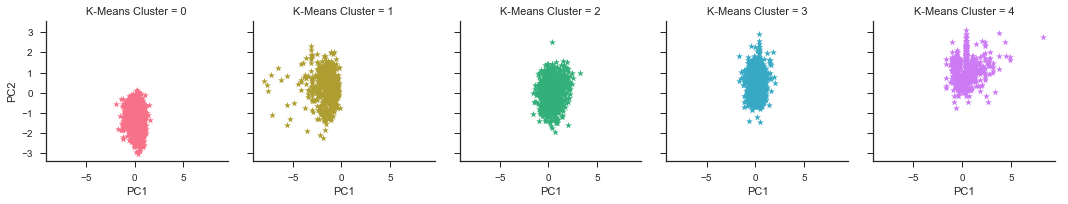

In [106]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet

# Show the results of a linear regression within each dataset
sns.lmplot(x="PC1", y="PC2",
           fit_reg=False,
           col="K-Means Cluster", 
           hue="K-Means Cluster", 
           data=onedate,
           size=3,
           col_wrap=5, 
           ci=None, 
           palette="husl",
           markers= "*",
           scatter_kws={"s": 50, "alpha": 1})



# capital is too large
1. onedate[onedate['K-Means Cluster']==0]
2. onedate[onedate['K-Means Cluster']==1]# when prrm large
3. onedate[onedate['K-Means Cluster']==2]# when booktomaket large
4. onedate[onedate['K-Means Cluster']==4]# when capital large

In [59]:
'''for i in range(5):
    sns.lmplot('PC1','PC2',
               data = onedate[onedate['K-Means Cluster']==i],
               hue = 'K-Means Cluster', 
               fit_reg=False, 
               size=3,
               aspect=1.5, 
               palette='husl');
    plt.title('KNN portfolio');
    plt.xlim((-0.5,10))
    plt.ylim((-3,40))'''

"for i in range(5):\n    sns.lmplot('PC1','PC2',\n               data = onedate[onedate['K-Means Cluster']==i],\n               hue = 'K-Means Cluster', \n               fit_reg=False, \n               size=3,\n               aspect=1.5, \n               palette='husl');\n    plt.title('KNN portfolio');\n    plt.xlim((-0.5,10))\n    plt.ylim((-3,40))"

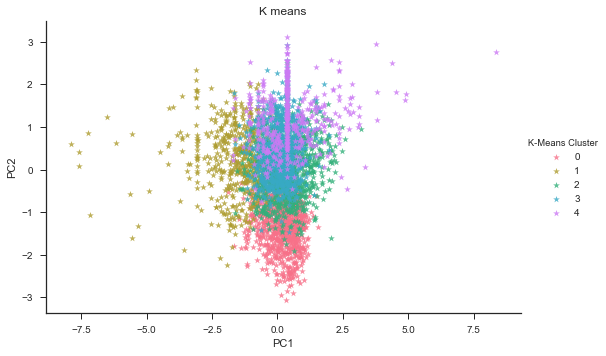

In [105]:
# visual clusters predicted by KMeans
sns.lmplot('PC1','PC2',
           data = onedate,
           hue = 'K-Means Cluster', 
           fit_reg=False, 
           size=5,
           aspect=1.5, 
           markers= "*",
           ci=None,
           palette='husl');
plt.title('K means');
#plt.xlim((-0.5,10))
#plt.ylim((-3,40))
plt.savefig('Kmeans.jpg')

In [61]:
from mpl_toolkits.mplot3d import Axes3D

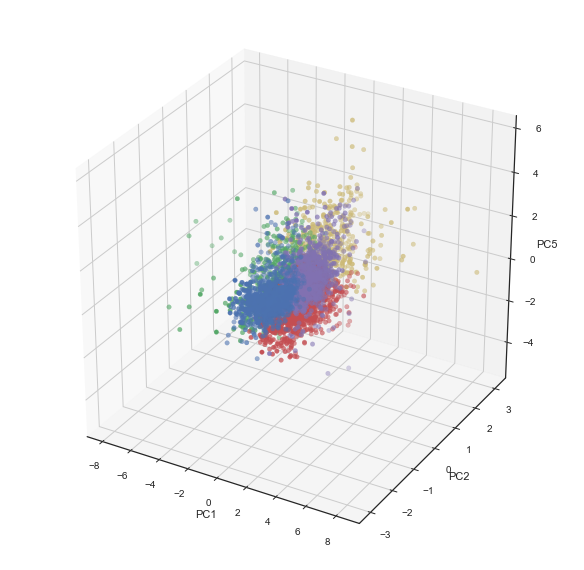

In [62]:
fig = plt.figure(figsize=[10,10])
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('PC1')
#ax1.set_xlim(-1,10)
ax1.set_ylabel('PC2')
#ax1.set_ylim()
ax1.set_zlabel('PC5')
#ax1.set_zlim()
#ax1.legend()
#ax = fig.add_subplot(111,projection='3d')  #这种方法也可以画多个子图
for i in range(5):
    cluster = onedate[onedate['K-Means Cluster']==i]
    ax1.scatter3D(cluster['PC1'],cluster['PC2'],cluster['PC5'])  #绘制散点图

#绘制空间曲线

plt.show()

# PCA K-means

In [63]:
newlist = []
total_date_number = len(dflist)
for i in range(total_date_number):
    df = dflist[i]
    ondate = pd.DataFrame()
    ondate = df.loc[:,['COMNAM','booktomarket','marketreturn','volum','capital','trt1m','prccm']]
    #PCA
    X = ondate.iloc[:,1:].values.astype(float)
    X = np.nan_to_num(X)
    pca = PCA(n_components=5,whiten=True)
    scores = pca.fit_transform(X)
    #add the first two PC tp data frame
    ondate['PC1'] = scores[:,0]
    ondate['PC2'] = scores[:,1]
    ondate['PC3'] = scores[:,2]
    ondate['PC4'] = scores[:,3]
    ondate['PC5'] = scores[:,4]
    # K means cluster into 11 clusters (there are 11 stocks sctors in the data)
    km =KMeans(n_clusters = 5,n_jobs=-1,random_state=42)
    km_pred = km.fit(ondate[['PC1','PC2','PC3','PC4','PC5']])
    # Add the cluster determined by KMeans to stocks_df
    ondate['K-Means Cluster'] = km_pred.labels_
    newlist.append(ondate)

In [64]:
newlist[21]

,COMNAM,booktomarket,marketreturn,volum,capital,trt1m,prccm,PC1,PC2,PC3,PC4,PC5,K-Means Cluster
4,ALEXANDER & ALEXANDER SVCS INC,-0.549310,-5.9843,0.308146,6.586703,-14.914291,2.883403,-0.275391,-1.217350,-0.011035,-0.122361,0.428470,4
7,APPLE COMPUTER INC,-0.838222,-5.9843,2.994567,8.115345,-24.362181,3.367296,-0.774491,-2.186855,-0.859910,-0.018596,0.090073,4
18,AMERICAN BANKERS INS GROUP INC,0.475599,-5.9843,-1.557320,4.667613,-4.959684,1.998096,0.249255,-0.230799,0.288808,0.678360,0.390746,4
25,AMSOUTH BANCORPORATION,0.310728,-5.9843,-1.079987,6.050199,-3.457799,2.897292,0.330170,-0.769681,0.617311,0.548580,0.560895,4
29,ANHEUSER BUSCH COS INC,-1.080250,-5.9843,1.879435,9.264903,-5.826915,3.624341,0.207197,-2.226386,-0.189146,-0.285585,1.717586,4
32,ASSOCIATED COMMUNICATIONS CORP D,-1.403640,-5.9843,-1.946310,5.011635,-11.441023,2.803360,-0.091546,-0.422446,0.655720,-1.320289,-0.087448,3
33,COORS ADOLPH CO,0.250989,-5.9843,1.211971,6.763540,-2.557733,3.183249,0.377617,-1.399053,-0.330924,0.938023,-0.265144,4
37,ACETO CORP,0.082676,-5.9843,-3.137296,3.774363,-6.744086,2.374906,0.155363,0.206231,1.037046,-0.055619,-0.289313,3
47,ACMAT CORP,1.695552,-5.9843,-4.000854,2.300959,-4.000566,2.505526,0.299025,0.751214,1.460816,1.328626,-1.696432,0
49,ASTROCOM CORP,0.249801,-5.9843,-2.537042,0.590041,-8.773891,-0.375421,0.043559,1.226596,-0.902552,0.461552,-0.738315,1


In [65]:
factor_list=[]
for df in newlist:
    factor=[]
    for i in range(5):
        pf=df.loc[df.index[df['K-Means Cluster']==i],:]
        price=np.sum(pf['prccm'])
        vr=np.sum(pf['prccm']*pf['trt1m'])/price
        factor.append(vr)
    factor_list.append(factor)

In [66]:
import copy

In [67]:
PC_list=['PC1','PC2','PC3','PC4','PC5']
def split(df,n,i):
    if i<5:
        df.sort_values(by=PC_list[i],ascending = False,inplace=True)
        n1=n//2
        i+=1
        df1=copy.deepcopy(df.iloc[:n1,:])
        split(df1,n1,i)
        df2=copy.deepcopy(df.iloc[n1:,:])
        split(df2,n1,i)
    else:
        split_list.append(df) 

rit_list=[]
for df in newlist:
    split_list=[]
    ret=[]
    n=len(df)
    split(df,n,0)
    for i in split_list:
        price=np.sum(i['prccm'])
        vr=np.sum(i['prccm']*i['trt1m'])/price
        ret.append(vr)
    rit_list.append(ret)

In [68]:
factor_list = pd.DataFrame(factor_list)
rit_list =  pd.DataFrame(rit_list)

In [69]:
np.shape(factor_list)

(361, 5)

In [70]:
x,y = np.shape(rit_list)
np.shape(rit_list)

(361, 32)

In [71]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# regression
## sklearn

In [72]:
coes = []
interc=[]
for i in range(y):
    res = reg.fit(factor_list.iloc[:,0:5],rit_list.iloc[:,i])
    coes.append(res.coef_)
    interc.append(res.intercept_)

In [73]:
coes = pd.DataFrame(coes)
coes.head()

,0,1,2,3,4
0,0.238983,0.168465,0.050520,0.230820,0.054797
1,0.228565,0.185543,0.053937,0.244075,0.055569
2,0.228389,0.170979,0.051944,0.220299,0.051198
3,0.223831,0.176293,0.051812,0.254353,0.053965
4,0.456980,-1.655848,0.498328,0.506889,0.095994


In [74]:
interc = pd.DataFrame(interc)
interc.head()

,0
0,-0.745427
1,-0.764389
2,-0.506449
3,-0.772751
4,11.551122


In [75]:
integrate = pd.concat([coes,interc],axis=1)
integrate

,0,1,2,3,4,0
0,0.238983,0.168465,0.050520,0.230820,0.054797,-0.745427
1,0.228565,0.185543,0.053937,0.244075,0.055569,-0.764389
2,0.228389,0.170979,0.051944,0.220299,0.051198,-0.506449
3,0.223831,0.176293,0.051812,0.254353,0.053965,-0.772751
4,0.456980,-1.655848,0.498328,0.506889,0.095994,11.551122
5,0.255171,0.108901,0.088438,0.357504,0.147915,0.203030
6,0.137708,0.113683,0.067475,0.381529,0.050965,0.629656
7,0.300754,0.289473,0.091003,0.273261,-0.016330,0.779731
8,0.206949,0.162313,0.050639,0.225545,0.055455,-1.013202
9,0.224489,0.157773,0.053516,0.237072,0.054705,-0.979155


In [76]:
integrate.mean()

0    0.141784
1    0.366019
2    0.024442
3    0.156361
4    0.026933
0   -0.949477
dtype: float64

## statsmodels

In [77]:
import statsmodels.api as sm

In [78]:
x,y = np.shape(rit_list)
coes = []
tvalues=[]
for i in range(y):
    d_p= np.array(factor_list)
    d_p = sm.add_constant(d_p)
    res = sm.OLS(rit_list.iloc[:,i],d_p).fit()
    coes.append(res.params)
    tvalues.append(res.tvalues)

In [79]:
tvalues = pd.DataFrame(tvalues)
tvalues.to_csv('tvaluesML.csv')
coes=pd.DataFrame(coes)
coes.to_csv('factorsML.csv')

In [80]:
coes = pd.DataFrame(coes)
coes

,const,x1,x2,x3,x4,x5
0,-0.745427,0.238983,0.168465,0.050520,0.230820,0.054797
1,-0.764389,0.228565,0.185543,0.053937,0.244075,0.055569
2,-0.506449,0.228389,0.170979,0.051944,0.220299,0.051198
3,-0.772751,0.223831,0.176293,0.051812,0.254353,0.053965
4,11.551122,0.456980,-1.655848,0.498328,0.506889,0.095994
5,0.203030,0.255171,0.108901,0.088438,0.357504,0.147915
6,0.629656,0.137708,0.113683,0.067475,0.381529,0.050965
7,0.779731,0.300754,0.289473,0.091003,0.273261,-0.016330
8,-1.013202,0.206949,0.162313,0.050639,0.225545,0.055455
9,-0.979155,0.224489,0.157773,0.053516,0.237072,0.054705


In [81]:
coes.mean()

const   -0.949477
x1       0.141784
x2       0.366019
x3       0.024442
x4       0.156361
x5       0.026933
dtype: float64

In [82]:
tvalues

,const,x1,x2,x3,x4,x5
0,-1.755525,8.986508,5.273583,3.413273,8.967095,3.934021
1,-1.738159,8.298663,5.608069,3.518590,9.155327,3.851953
2,-1.184364,8.527999,5.314767,3.484849,8.498426,3.649869
3,-1.777496,8.220759,5.390114,3.419047,9.651205,3.784065
4,1.379020,0.871097,-2.627603,1.706729,0.998240,0.349352
5,0.111106,2.229619,0.792138,1.388422,3.227258,2.467544
6,0.631197,2.204165,1.514779,1.940465,6.309060,1.557424
7,0.376805,2.320634,1.859405,1.261628,2.178346,-0.240572
8,-2.476679,8.077160,5.273756,3.551063,9.094574,4.132263
9,-2.271566,8.315563,4.865191,3.561729,9.072572,3.868765


In [83]:
def GRS_test(
             lamb, # K*1 column vector of the factor means
             omegahat, # K*K covariance matrix of factors
             a_hat, # N*1 column vector of intercept estimates
             e, # error terms
             alpha=0.05,
             K=5, # number of factors
             N=32, # number of assets
            ):
    T = 361
    if T-N-K < 0:
        print('T-N-K<0')
        return
    
    lamb = np.mat(lamb).reshape(K,1) # K*1
    omegahat = np.mat(omegahat).reshape(K,K) # K*K
    #e = pd.DataFrame(e,index = np.arange(T)) # T*1
    ahat = pd.DataFrame(columns=['intercept'],data=a_hat.values)
    
    # column vectors of alpha estimates
    ahat = np.mat(ahat.values).reshape(N,1)
    # residual covariance matrix
    #sigmahat = np.mat(np.cov(e)).reshape(N,N)
    sigmahat = e
    
    omega_mat = np.linalg.inv(omegahat)
    sigma_mat = np.linalg.inv(sigmahat)
    print('T-N-K',T-N-K)
    print('ahat.T =',ahat.T)
    print('sigma_mat',sigma_mat)
    print('ahat =',ahat)
    print('lamb.T = ',lamb.T)
    print('lamb =',lamb)
    print('omega_mat = ',omega_mat)
    GRS = (T-N-K)*1.0/N*(ahat.T * sigma_mat * ahat)/(1+lamb.T*omega_mat*lamb)[0][0]
    F=stats.f.isf(alpha,N,T-N-K)  #自由度为N,T-N-K，显著水平alpha%下的F分位值
    return GRS,F

In [84]:
lamb=factor_list.mean()

In [85]:
omegahat=factor_list.cov()

In [86]:
a_hat=coes['const']

In [72]:
coes.loc[0][1:]

x1    0.261722
x2   -0.000827
x3   -0.000518
x4    0.000222
x5    0.000202
Name: 0, dtype: float64

In [78]:
np.sum(factor_list.loc[0].values*coes.loc[0][1:].values)+coes.loc[0][0]

7.327201621831775

In [87]:
err_list=[]
for i in range(361):
    err=[]
    for j in range(32):
        err.append(rit_list.loc[i,j]-np.sum(factor_list.loc[i].values*coes.loc[j][1:].values)-coes.loc[j][0])
    err_list.append(err)

In [88]:
err_list=pd.DataFrame(err_list)

In [100]:
e=err_list.cov()

In [92]:
import scipy.stats as stats

In [96]:
GRS_test(lamb, # K*1 column vector of the factor means
         omegahat, # K*K covariance matrix of factors
         a_hat, # N*1 column vector of intercept estimates
         e,)

T-N-K 324
ahat.T = [[ -0.74542652  -0.76438861  -0.5064491   -0.77275119  11.5511218
    0.20303036   0.62965614   0.77973055  -1.01320222  -0.97915488
   -0.86563387  -0.97527763  -3.81863214   1.71987287  -1.27741726
   -0.53079312   0.36376463   0.30526047   0.3832678    0.40279533
   -2.05615331 -40.91483427   5.66916645   1.91327919   0.35782541
    0.25609146   0.3474034    0.28577086   1.62342755  -6.54114311
    3.73179412   0.85474354]]
sigma_mat [[ 4.10786645e-01 -1.96410463e-01 -1.64322932e-01 ... -1.10275231e-04
   1.07653892e-04 -1.02455678e-02]
 [-1.96410463e-01  5.23306201e-01  4.46569620e-02 ... -1.19831995e-04
   1.30175805e-03  4.49253803e-03]
 [-1.64322932e-01  4.46569620e-02  3.74342066e-01 ...  1.16670676e-05
   1.68289761e-03 -4.67735080e-03]
 ...
 [-1.10275231e-04 -1.19831995e-04  1.16670676e-05 ...  3.64135356e-05
   2.89285848e-06  1.14075167e-04]
 [ 1.07653892e-04  1.30175805e-03  1.68289761e-03 ...  2.89285848e-06
   1.53252451e-03 -1.02780341e-03]
 [-1.02455

(matrix([[2.75638329]]), 1.4794994072528131)

In [91]:
import scipy.stats as stats

In [95]:
omegahat


,0,1,2,3,4
0,253.357263,-4.381539,-23.092842,-10.050995,-21.217035
1,-4.381539,174.710774,-0.822603,6.964651,-1.872015
2,-23.092842,-0.822603,814.872913,3.194477,-6.890604
3,-10.050995,6.964651,3.194477,269.359818,0.388105
4,-21.217035,-1.872015,-6.890604,0.388105,919.492077


In [227]:
lamb

0    2.618439
1    1.489325
2    2.466784
3    1.841852
4    3.005185
dtype: float64

In [228]:
a_hat

0      4.868041
1     -0.738592
2      4.346224
3     -3.817382
4      7.208711
5     -0.924534
6      2.823290
7     -2.542237
8      4.731777
9     -3.327661
10     1.562797
11    -4.880426
12     5.250058
13    -1.853503
14     0.026205
15    -5.020886
16     5.759052
17    -3.528623
18     2.687910
19    -5.564851
20     7.189186
21    -1.522919
22     0.974680
23    -4.160188
24     5.490797
25    -8.692523
26     0.039527
27   -11.929734
28     6.739419
29    -5.846046
30    -0.972247
31   -11.040852
Name: const, dtype: float64

In [172]:
err_list

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.760472,1.976981,-7.165558,0.220632,-0.376367,5.051531,-4.540095,-0.149215,-1.365140,5.062726,...,-8.109987,0.528534,1.634383,14.845862,-16.342333,-0.032942,5.447569,21.020103,-13.828511,-0.818026
1,-11.115015,-9.488707,-5.050543,-0.839354,-6.187689,-3.466908,8.079479,4.582116,-15.199701,-8.788730,...,11.829372,23.380936,-34.083707,-15.039897,-15.240489,-0.236381,-9.801630,12.788315,17.032495,46.542824
2,4.437026,6.708081,0.444744,7.594601,-10.619968,-1.334250,-7.929222,-1.236949,3.240398,8.709781,...,-12.218372,-1.132182,15.575898,34.155369,5.887029,16.563140,-18.045720,1.460923,-16.498857,-2.774922
3,6.548742,8.164003,0.774475,6.956680,-10.183553,-2.178494,-8.285435,2.674055,6.338494,10.462955,...,-11.213652,-2.038678,11.215838,31.667675,4.542171,12.562417,-21.815192,-4.591801,-20.272109,-5.818215
4,2.084452,2.695639,4.073278,10.394168,-8.901584,-4.377894,12.257125,1.199894,-0.575000,2.455474,...,-9.959008,-1.749347,-2.851891,17.023940,7.221441,13.628349,-28.588919,-14.748398,-16.400171,-7.132628
5,-0.267064,5.193506,-7.150125,2.427845,4.443643,9.480543,-1.411667,3.494099,-0.341345,6.264514,...,-4.632663,3.487713,-11.175206,9.767702,-26.943234,-7.202722,3.397290,32.339034,-10.983245,4.119063
6,0.259663,4.574655,-9.015266,0.314177,-0.670111,6.511347,-8.885486,2.902489,0.520661,7.098856,...,-11.511293,-0.933316,-2.983480,17.869586,-18.817571,-0.506860,8.251561,25.920500,-16.822580,1.828564
7,2.024171,3.913555,-5.682916,1.354182,3.572066,5.380893,4.787478,0.253858,-0.377846,4.120504,...,-6.623977,0.107225,-8.552138,0.288036,-18.328931,-1.326156,-1.667388,13.237453,-15.237785,-5.673932
8,3.631420,-0.945535,-9.742599,-4.601529,-3.335569,-1.633575,-2.036938,-5.776716,-0.483690,-1.559666,...,-11.905263,-5.931399,-4.567456,16.926055,-14.631874,-2.618601,-13.173255,-5.604509,-20.654134,-13.125195
9,-1.445521,-1.173511,-10.442157,-2.946580,-1.069317,1.705379,0.401223,-2.409989,-3.283860,0.050526,...,-9.086962,-1.713980,-1.864016,14.015614,-16.867156,-1.740854,-2.539395,6.232219,-15.424620,-4.986639


In [174]:
factor_list

,0,1,2,3,4
0,3.242591,13.857700,0.000000,3.473743,1.623596
1,4.671419,37.625464,13.157900,8.373840,4.787200
2,0.698251,-4.060900,-2.325600,-3.412585,2.961388
3,3.529842,-4.761900,2.721033,6.476154,4.761900
4,4.985692,-0.660100,26.767700,6.169865,5.265745
5,6.808755,4.092550,2.390400,-5.555600,4.362151
6,-0.073945,-0.496595,2.334600,-5.882400,2.292835
7,9.472341,5.965768,14.068400,5.228700,9.432385
8,3.037854,6.333300,12.007712,43.478300,2.839510
9,1.878434,0.488096,20.398000,8.150500,0.422063


In [176]:
date[305:]

array([198812, 198901, 198902, 198903, 198904, 198905, 198906, 198907,
       198908, 198909, 198910, 198911, 198912, 199001, 199002, 199003,
       199004, 199005, 199006, 199007, 199008, 199009, 199010, 199011,
       199012, 199101, 199102, 199103, 199104, 199105, 199106, 199107,
       199108, 199109, 199110, 199111, 199112, 199201, 199202, 199203,
       199204, 199205, 199206, 199207, 199208, 199209, 199210, 199211,
       199212, 199301, 199302, 199303, 199304, 199305, 199306, 199307,
       199308, 199309, 199310, 199311, 199312, 199401, 199402, 199403,
       199404, 199405, 199406, 199407, 199408, 199409, 199410, 199411,
       199412, 199501, 199502, 199503, 199504, 199505, 199506, 199507,
       199508, 199509, 199510, 199511, 199512, 199601, 199602, 199603,
       199604, 199605, 199606, 199607, 199608, 199609, 199610, 199611,
       199612, 199701, 199702, 199703, 199704, 199705, 199706, 199707,
       199708, 199709, 199710, 199711, 199712, 199801, 199802, 199803,
      